In [29]:
# want to look at segments with ratios >1
# find out what tracers, look at UT and BL distributions 
# date created: 3/26/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares
import scipy

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [3]:
# load in both toga and awas data pickles 
utbl_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/utbl_allseg_campavgbl.pkl")
tau_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/tau_allseg_campavgbl.pkl")
seginfo_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/segment_info_campavgbl.pkl")
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/trcnames_allseg.pkl")

toga_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/toga_segments.pkl")
awas_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_segments.pkl")

awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")

In [4]:
##########################################################################################
########## find which tracers are > 0.9 
vsl = np.where(tau_allseg < 100)
col = list(tau_allseg)

seg_with_gt = [] #identify segments that have high ratios
gtcount_perseg = [] #count the number of high ratios per segment 
gt_utbl = pd.DataFrame() #the UTBL of high ratios 
gt_tracers = pd.DataFrame() #the names of tracers with high ratios 

# iterate through each segment 
for i in col:
    vsl_idx = np.where(tau_allseg[i] < 100)
    gt_idx = np.where(utbl_allseg[i].loc[vsl_idx] > 0.9)
    if (np.size(gt_idx) > 0):
        # segment info 
        seg_with_gt.append(i)
        # count of >0.9 per segment 
        gtcount_perseg.append(np.size(gt_idx))
        # tracer names of those with >0.9
        tracers = trcnames_allseg[i].loc[gt_idx]
        diffa = 52 - len(tracers)
        if (diffa > 0):
            filla = np.empty((1,diffa))
            filla.fill(np.nan)
            tracers = np.append(tracers, filla)
        gt_tracers[i] = tracers

gt_seginfo = seginfo_allseg.iloc[seg_with_gt]
gt_seginfo['Num. gt Per Seg'] = gtcount_perseg

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
##########################################################################################

In [6]:
##########################################################################################

In [7]:
# reshape, trim tracers 
gt_tracers = gt_tracers.transpose()
col = list(gt_tracers)
for i in col:
    if (gt_tracers[i].isna().sum() == len(gt_tracers)):
        del gt_tracers[i]

In [8]:
# tracer names that have the high ratios 
gt_tracers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBrCl2_Bromodichloromethane,CH2Br2_Methylene_bromide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CH2Br2_Methylene_bromide,Dibromomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CH2Br2_Methylene_bromide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBr3_Bromoform,CH2Br2_Methylene_bromide,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C2H5ONO2_Ethyl_nitrate,CHBr2Cl_Dibromochloromethane,CHBr3_Bromoform,CHBrCl2_Bromodichloromethane,CH2Br2_Methylene_bromide,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,CHBrCl2_Bromodichloromethane,Dibromomethane,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,CHBrCl2_Bromodichloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,CHBrCl2_Bromodichloromethane,Dibromomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,CH2BrCl_Bromochloromethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# list of all tracers, not separated by segment 
alltracers = []
col = list(gt_tracers)
for i in col:
    trc = gt_tracers[i].values
    for i in trc:
        if (type(i) == str):
            alltracers.append(i)

In [10]:
# function to get unique values 
def unique(list1):  
    # intilize a null list 
    unique_list = []     
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return(unique_list)
    # print list 
    #for x in unique_list: 
        #print(x)

In [11]:
# find unique in list 
unq = unique(alltracers)
trc_gt = pd.DataFrame()
trc_gt['Tracer'] = unq

# identify which instrument 
awas = list(awas_df)
toga = list(toga_df)
inst_gt = []
cnt = []
for tt in unq:
    if tt in awas:
        inst_gt.append('AWAS')
    if tt in toga:
        inst_gt.append('TOGA')
    # count how many times each tracer appears in list 
    cnt.append(alltracers.count(tt))
    
trc_gt['Instrument'] = inst_gt
trc_gt['Count'] = cnt

trc_gt = trc_gt.sort_values('Count', ascending = False)
trc_gt = trc_gt.reset_index(drop = True)

In [12]:
# load lifetimes 
mypath1 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_lifetimes_12162019.xlsx'
toga_lifetimes = pd.read_excel(mypath1)
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)

# get liftime for each species 
lifetimes = []
for index, row in trc_gt.iterrows():
    tname = row.Tracer
    if row.Instrument == 'TOGA':
        tau = toga_lifetimes[toga_lifetimes['Trace_Gas'] == tname]
        bltau = str(np.round(tau['BL_tau'].values, 2))
        lifetimes.append(bltau[1:-1])  
    else:
        tau = awas_lifetimes[awas_lifetimes['Trace_Gas'] == tname]
        bltau = str(np.round(tau['BL_tau'].values, 2))
        lifetimes.append(bltau[1:-1])   

# add to dataframe 
trc_gt['Lifetime'] = lifetimes
trc_gt['Lifetime'].iloc[7] = 15.07
trc_gt

//anaconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Tracer,Instrument,Count,Lifetime
0,Dibromomethane,TOGA,133,39.13
1,CHBrCl2_Bromodichloromethane,AWAS,63,27.46
2,CH2Br2_Methylene_bromide,AWAS,57,39.13
3,CH2BrCl_Bromochloromethane,AWAS,56,45.19
4,CHBr2Cl_Dibromochloromethane,AWAS,50,13.37
5,C2H5ONO2_Ethyl_nitrate,AWAS,44,12.35
6,CHBr3_Bromoform,AWAS,21,15.07
7,Bromoform,TOGA,18,15.07
8,C2H4Cl2_1_2_Dichloroethane,AWAS,16,19.
9,CH2Cl2_Methylene_chloride,AWAS,15,45.87


In [13]:
##########################################################################################
##########################################################################################

In [14]:
# map 

In [15]:
gt_seg_idx = gt_seginfo.index.values
gt_seginfo

,Time_UTC,Flight,r squared,mean age,mode age,Num. gt Per Seg
0,2014-01-22 01:44:00,RF05,0.755465,9.123310,2.289063,4
1,2014-01-22 01:55:15,RF05,0.820633,9.500306,2.539063,4
2,2014-01-22 02:06:30,RF05,0.864879,11.850897,3.039063,3
3,2014-01-22 02:17:45,RF05,0.774219,9.909802,2.539063,6
4,2014-01-22 02:29:00,RF05,-0.829456,5.872662,1.464449,7
...,...,...,...,...,...,...
167,2014-02-22 00:57:11,RF14,0.878783,10.944136,2.955122,3
168,2014-02-22 01:07:12,RF14,0.929451,12.916146,3.289063,1
169,2014-02-22 01:15:43,RF14,0.908847,10.450336,2.789063,2
170,2014-02-22 01:24:44,RF14,0.926413,16.190663,4.289063,1


In [16]:
toga_seg_gt = toga_seg.loc[gt_seg_idx]
awas_seg_gt = awas_seg.loc[gt_seg_idx]

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/envs/py3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
//anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns

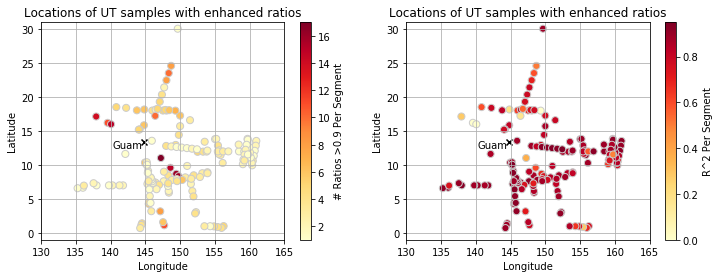

In [17]:
fig, ax = plt.subplots(figsize=(12, 4), ncols = 2)

# number of enhanced 
sc = ax[0].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], c = gt_seginfo['Num. gt Per Seg'], 
           edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[0])
cb.set_label('# Ratios >0.9 Per Segment')

ax[0].set_xlim([130, 165])
ax[0].set_ylim([-1, 31])
ax[0].set_title('Locations of UT samples with enhanced ratios')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which = 'Major')

guam = [144.79, 13.44]
ax[0].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[0].text(guam[0]-4.5, guam[1]-1, 'Guam')

# rsquared
rsq = gt_seginfo['r squared']
rsq[rsq < 0] = 0
sc = ax[1].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], c = rsq, 
           edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[1])
cb.set_label('R^2 Per Segment')

ax[1].set_xlim([130, 165])
ax[1].set_ylim([-1, 31])
ax[1].set_title('Locations of UT samples with enhanced ratios')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].grid(which = 'Major')

guam = [144.79, 13.44]
ax[1].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[1].text(guam[0]-4.5, guam[1]-1, 'Guam')

#
fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/map_plot_0.pdf')  


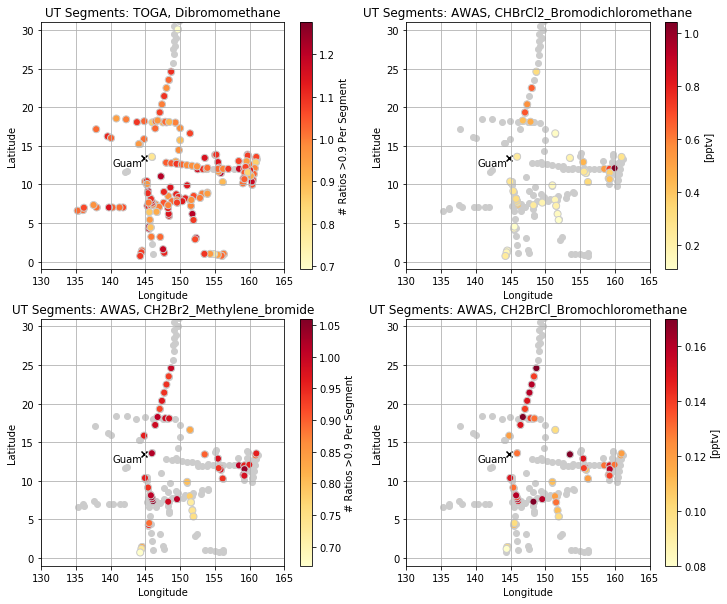

In [18]:
# plot tracer concentrations in UT for the tracers with the most frequent enhanced ratios 
fig, ax = plt.subplots(figsize=(12, 10), ncols = 2, nrows = 2)

# ---------------------------------- dibromomethane
scb = ax[0,0].scatter(toga_seg['GGLON'], toga_seg['GGLAT'], c = '0.8')
sc = ax[0,0].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = toga_seg_gt['Dibromomethane'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[0,0])
cb.set_label('# Ratios >0.9 Per Segment')

ax[0,0].set_xlim([130, 165])
ax[0,0].set_ylim([-1, 31])
ax[0,0].set_title('UT Segments: TOGA, Dibromomethane')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
ax[0,0].grid(which = 'Major')

guam = [144.79, 13.44]
ax[0,0].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[0,0].text(guam[0]-4.5, guam[1]-1, 'Guam')

# ---------------------------------- CHBrCl2
scb = ax[0,1].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8')
sc = ax[0,1].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['CHBrCl2_Bromodichloromethane'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[0, 1])
cb.set_label('[pptv]')

ax[0, 1].set_xlim([130, 165])
ax[0, 1].set_ylim([-1, 31])
ax[0, 1].set_title('UT Segments: AWAS, CHBrCl2_Bromodichloromethane')
ax[0, 1].set_xlabel('Longitude')
ax[0, 1].set_ylabel('Latitude')
ax[0, 1].grid(which = 'Major')

guam = [144.79, 13.44]
ax[0, 1].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[0, 1].text(guam[0]-4.5, guam[1]-1, 'Guam')


# ---------------------------------- CH2Br2_Methylene_bromide
scb = ax[1,0].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8')
sc = ax[1,0].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['CH2Br2_Methylene_bromide'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[1,0])
cb.set_label('# Ratios >0.9 Per Segment')

ax[1,0].set_xlim([130, 165])
ax[1,0].set_ylim([-1, 31])
ax[1,0].set_title('UT Segments: AWAS, CH2Br2_Methylene_bromide')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
ax[1,0].grid(which = 'Major')

guam = [144.79, 13.44]
ax[1,0].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[1,0].text(guam[0]-4.5, guam[1]-1, 'Guam')

# ---------------------------------- CH2BrCl_Bromochloromethane
scb = ax[1,1].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8')
sc = ax[1,1].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['CH2BrCl_Bromochloromethane'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[1, 1])
cb.set_label('[pptv]')

ax[1, 1].set_xlim([130, 165])
ax[1, 1].set_ylim([-1, 31])
ax[1, 1].set_title('UT Segments: AWAS, CH2BrCl_Bromochloromethane')
ax[1, 1].set_xlabel('Longitude')
ax[1, 1].set_ylabel('Latitude')
ax[1, 1].grid(which = 'Major')

guam = [144.79, 13.44]
ax[1, 1].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[1, 1].text(guam[0]-4.5, guam[1]-1, 'Guam')

#
fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/map_plot_1.pdf')  


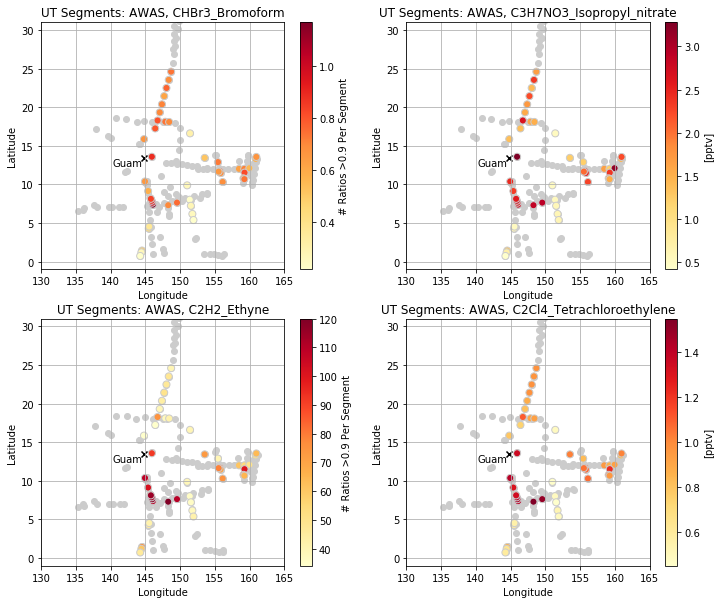

In [19]:
# plot tracer concentrations in UT for the tracers with the most frequent enhanced ratios 
fig, ax = plt.subplots(figsize=(12, 10), ncols = 2, nrows = 2)

# ---------------------------------- CHBr3_Bromoform
scb = ax[0,0].scatter(toga_seg['GGLON'], toga_seg['GGLAT'], c = '0.8')
sc = ax[0,0].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['CHBr3_Bromoform'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[0,0])
cb.set_label('# Ratios >0.9 Per Segment')

ax[0,0].set_xlim([130, 165])
ax[0,0].set_ylim([-1, 31])
ax[0,0].set_title('UT Segments: AWAS, CHBr3_Bromoform')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
ax[0,0].grid(which = 'Major')

guam = [144.79, 13.44]
ax[0,0].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[0,0].text(guam[0]-4.5, guam[1]-1, 'Guam')

# ---------------------------------- C3H7NO3_Isopropyl_nitrate
scb = ax[0,1].scatter(toga_seg['GGLON'], toga_seg['GGLAT'], c = '0.8')
sc = ax[0,1].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['C3H7NO3_Isopropyl_nitrate'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[0, 1])
cb.set_label('[pptv]')

ax[0, 1].set_xlim([130, 165])
ax[0, 1].set_ylim([-1, 31])
ax[0, 1].set_title('UT Segments: AWAS, C3H7NO3_Isopropyl_nitrate')
ax[0, 1].set_xlabel('Longitude')
ax[0, 1].set_ylabel('Latitude')
ax[0, 1].grid(which = 'Major')

guam = [144.79, 13.44]
ax[0, 1].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[0, 1].text(guam[0]-4.5, guam[1]-1, 'Guam')


# ---------------------------------- C2H2_Ethyne
scb = ax[1,0].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8')
sc = ax[1,0].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['C2H2_Ethyne'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[1,0])
cb.set_label('# Ratios >0.9 Per Segment')

ax[1,0].set_xlim([130, 165])
ax[1,0].set_ylim([-1, 31])
ax[1,0].set_title('UT Segments: AWAS, C2H2_Ethyne')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
ax[1,0].grid(which = 'Major')

guam = [144.79, 13.44]
ax[1,0].scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
ax[1,0].text(guam[0]-4.5, guam[1]-1, 'Guam')

# ---------------------------------- C2Cl4_Tetrachloroethylene
scb = ax[1,1].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8')
sc = ax[1,1].scatter(toga_seg_gt['GGLON'], toga_seg_gt['GGLAT'], 
                     c = awas_seg_gt['C2Cl4_Tetrachloroethylene'], 
                     edgecolor = '0.8', cmap = 'YlOrRd', s = 50)
cb = plt.colorbar(sc, ax = ax[1, 1])
cb.set_label('[pptv]')

ax[1, 1].set_xlim([130, 165])
ax[1, 1].set_ylim([-1, 31])
ax[1, 1].set_title('UT Segments: AWAS, C2Cl4_Tetrachloroethylene')
ax[1, 1].set_xlabel('Longitude')
ax[1, 1].set_ylabel('Latitude')
ax[1, 1].grid(which = 'Major')

guam = [144.79, 13.44]
ax[1, 1].scatter(guam[0], guam[1], marker = 'x', color = 'k')
ax[1, 1].text(guam[0]-4.5, guam[1]-1, 'Guam')

# 
fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/map_plot_2.pdf')  


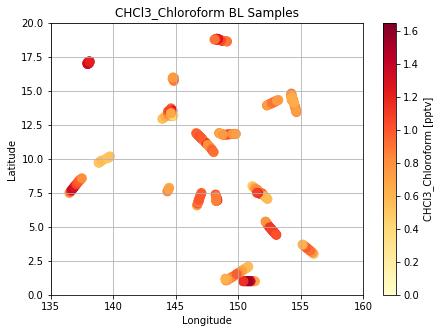

In [20]:
###########################################################################################
fig, ax = plt.subplots(figsize=(7, 5))

toga_bl = toga_df[toga_df['GGALT'] < 2000]
awas_bl = awas_df[awas_df['GGALT'] < 2000]

# plot BL
sc = ax.scatter(toga_bl['GGLON'], toga_bl['GGLAT'], c = toga_bl['Bromoform'], 
        cmap = 'YlOrRd', s = 80, vmin = 0, vmax = 1.65)
sc = ax.scatter(awas_bl['GGLON'], awas_bl['GGLAT'], c = awas_bl['CHBr3_Bromoform'], 
        cmap = 'YlOrRd', s = 80, vmin = 0, vmax = 1.65)
cb = plt.colorbar(sc, ax = ax)
cb.set_label(tt + ' [pptv]')
ax.set_xlim([135, 160])
ax.set_ylim([0, 20])
ax.set_title(tt + ' BL Samples')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(which = 'major')

#fig.savefig('/Users/schelpon/Desktop/Bromoform2.png')  

In [21]:
toga_bl['Bromoform'].describe()
#awas_bl['CHBr3_Bromoform'].describe()

count    219.000000
mean       0.957968
std        0.257349
min        0.050000
25%        0.781000
50%        0.932000
75%        1.108500
max        1.638000
Name: Bromoform, dtype: float64

(0, 35)

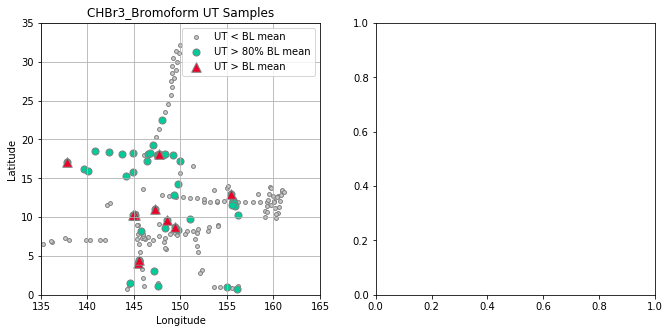

In [22]:
# plot only where ut > bl concentration
tt = 'CHBr3_Bromoform'
trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
bl = trcdf[trcdf['GGALT'] < 2000]
blmean = bl[tt].mean()
trc_isgt = awas_seg[awas_seg[tt] > blmean]
trc_close = awas_seg[awas_seg[tt] > (blmean*0.8)]

rd = [[0.93, 0, 0.16]]
tl = [[0, 0.80, 0.60]]

# plot UT 
fig, ax = plt.subplots(figsize=(11, 5), ncols = 2)
scb = ax[0].scatter(awas_seg['GGLON'], awas_seg['GGLAT'], c = '0.8', label = 'UT < BL mean', 
                 edgecolor = '0.5', s = 15)
sc = ax[0].scatter(trc_close['GGLON'], trc_close['GGLAT'], s = 50, 
                     edgecolor = '0.5', c = tl, label = 'UT > 80% BL mean')
sc = ax[0].scatter(trc_isgt['GGLON'], trc_isgt['GGLAT'], s = 90, marker = '^',
                     edgecolor = '0.5', c = rd, label = 'UT > BL mean')
ax[0].legend()
ax[0].set_title(tt + ' UT Samples')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which = 'major')
ax[0].set_xlim([135, 165])
ax[0].set_ylim([0, 35])


In [23]:
# plot only where ut > bl concentration
rd = [[0.93, 0, 0.16]]
tl = [[0, 0.80, 0.60]]

# landmarks 
chuuk = [151.78, 7.4]
palau = [134.58, 7.51]
guam = [144.79, 13.44]

def plot_utsamp(trc_idx): 
    #######################################################################
    # ---------- choose tracer 
    tt = trc_gt['Tracer'][i]
    inst = trc_gt['Instrument'][i]
    # dataframe for that tracer 
    if inst == 'AWAS':
        trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
        trc_seg = awas_seg
    if inst == 'TOGA':
        trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
        trc_seg = toga_seg
    # get BL mean 
    bl = trcdf[trcdf['GGALT'] < 2000]
    blmean = bl[tt].mean()
    # get UT samples gt, lt bl mean 
    trc_isgt = trc_seg[trc_seg[tt] > blmean]
    trc_close = trc_seg[trc_seg[tt] > (blmean*0.8)]
    # plot 
    fig, ax = plt.subplots(figsize=(6, 5))
    scb = plt.scatter(trc_seg['GGLON'], trc_seg['GGLAT'], label = 'UT < BL mean', 
                 c = '0.8', edgecolor = '0.5', s = 15)
    sc = plt.scatter(trc_close['GGLON'], trc_close['GGLAT'], s = 50, 
                     edgecolor = '0.5', c = tl, label = 'UT > 80% BL mean')
    sc = plt.scatter(trc_isgt['GGLON'], trc_isgt['GGLAT'], s = 90, marker = '^',
                     edgecolor = '0.5', c = rd, label = 'UT > BL mean')
    plt.legend()
    plt.title(tt + ' UT Samples')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(which = 'major')
    #
    ax.set_xlim([135, 160])
    ax.set_ylim([0, 20])
    # add guam 
    plt.scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
    plt.text(guam[0]-3, guam[1]-1, 'Guam')
    ax.scatter(chuuk[0], chuuk[1], marker = 'x', color = 'k', label = 'Chuuk')
    ax.text(chuuk[0]+1, chuuk[1]-0.5, 'Chuuk')
    # save 
    svname = str(trc_idx) + '_' + str(tt) + '_UT_samples' 
    fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/gt1_utsamp/' + svname)  


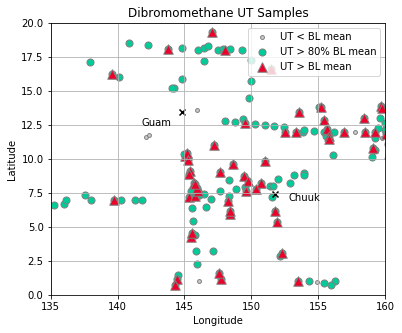

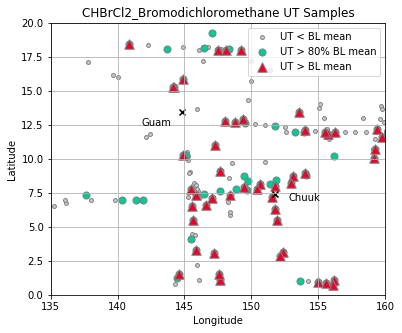

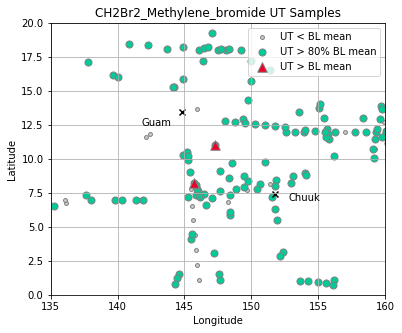

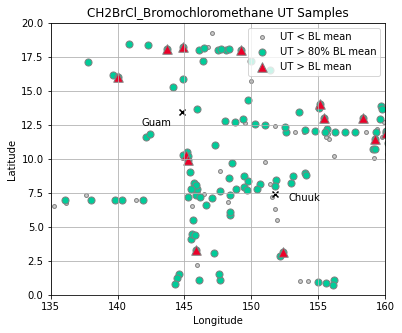

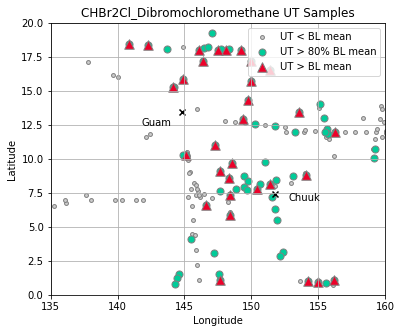

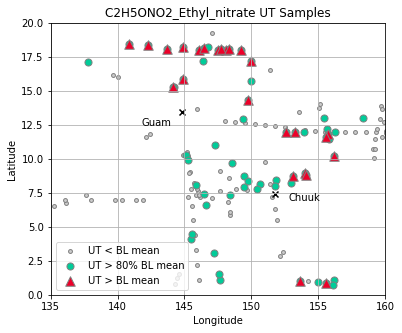

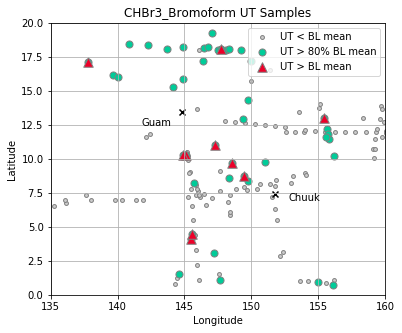

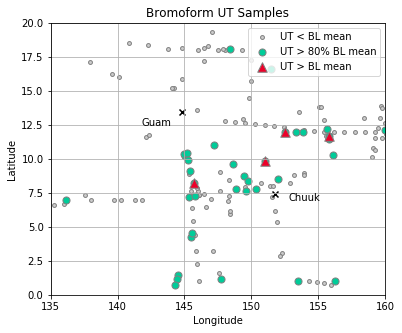

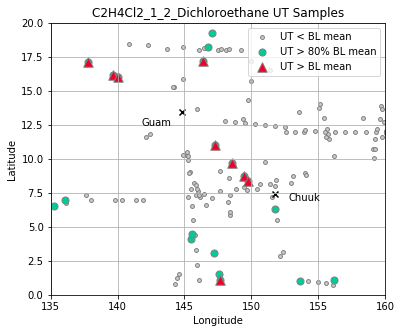

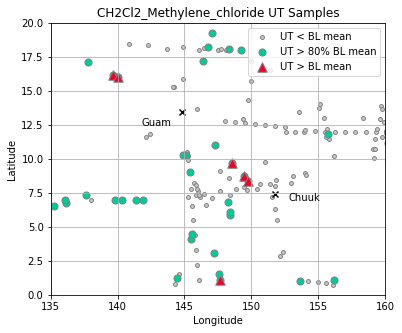

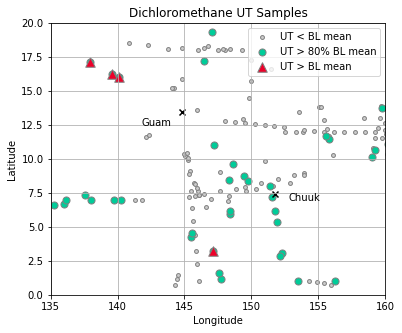

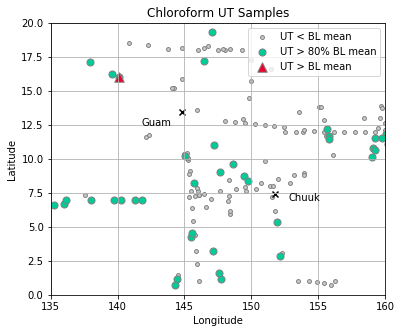

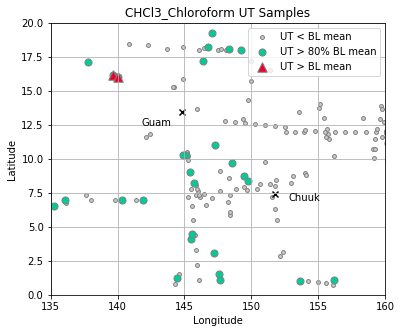

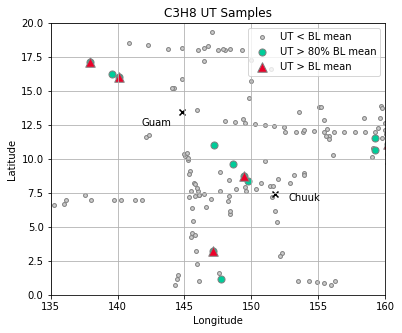

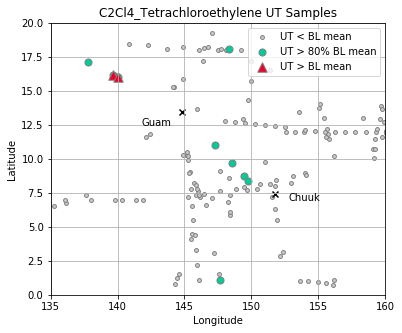

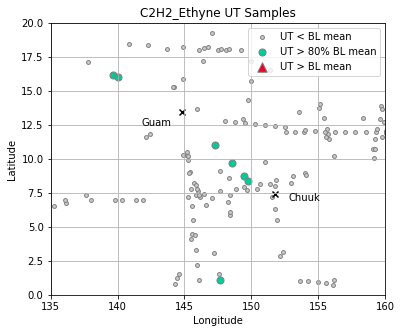

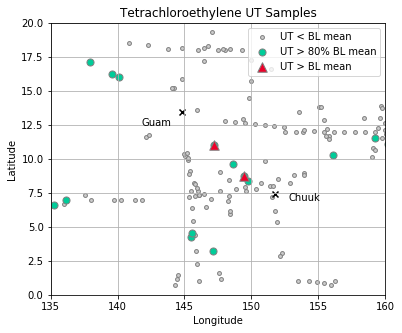

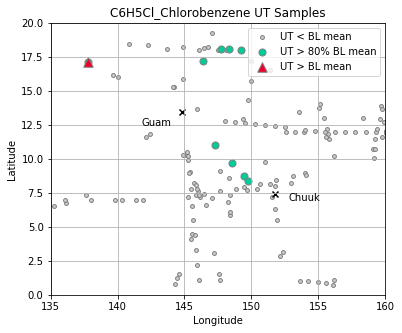

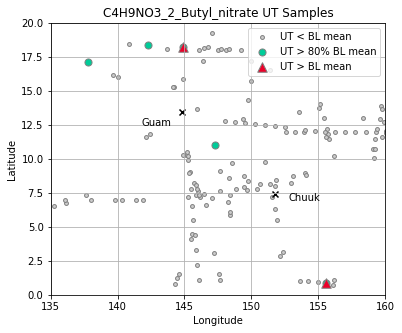

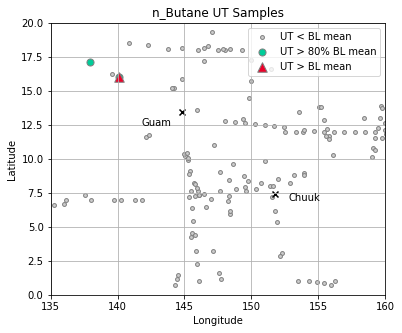

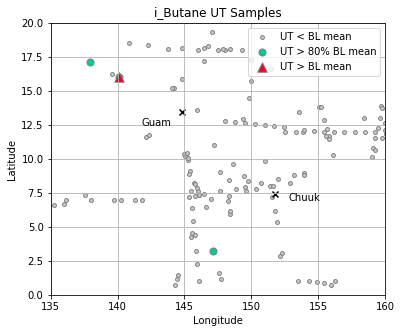

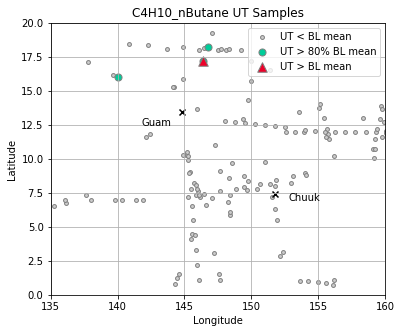

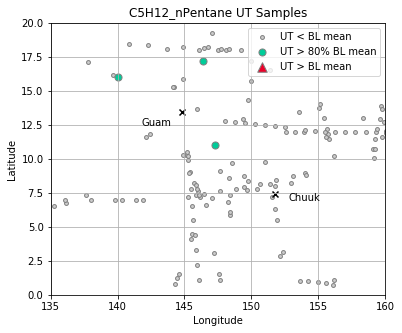

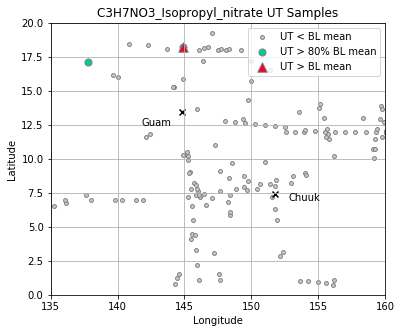

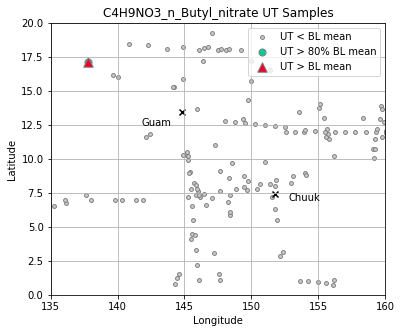

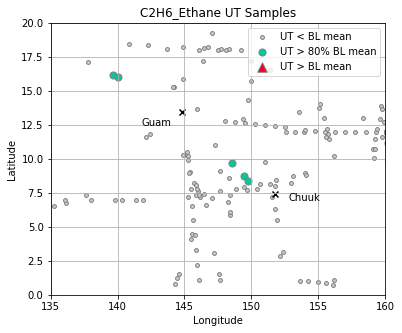

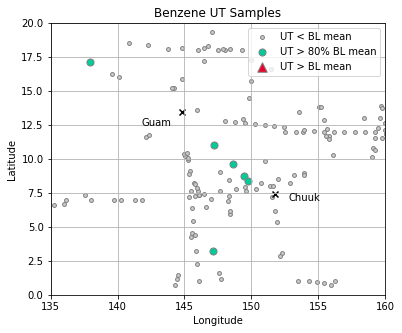

In [24]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, len(trc_gt)):
    trc_idx = i
    plot_utsamp(trc_idx)

In [30]:
# plot bl samples 
def plot_blsamp(trc_idx): 
    #######################################################################
    # ---------- choose tracer 
    tt = trc_gt['Tracer'][i]
    inst = trc_gt['Instrument'][i]
    # dataframe for that tracer 
    if inst == 'AWAS':
        trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
    if inst == 'TOGA':
        trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
    # get BL mean 
    trcbl = trcdf[trcdf['GGALT'] < 2000]
    # plot 
    fig, ax = plt.subplots(figsize=(7, 5))
    scb = plt.scatter(trcbl['GGLON'], trcbl['GGLAT'], c = trcbl[tt], s = 80,
                     cmap = 'cool')
    cb = plt.colorbar(scb, ax = ax)
    cb.set_label(tt + ' [pptv]')
    ax.set_xlim([135, 160])
    ax.set_ylim([0, 20])
    ax.set_title(inst + ' ' + tt + ' BL Samples')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(which = 'major')
    # add guam 
    plt.scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
    plt.text(guam[0]-3, guam[1]-1, 'Guam')
    ax.scatter(chuuk[0], chuuk[1], marker = 'x', color = 'k', label = 'Chuuk')
    ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')

    # save 
    svname = str(trc_idx) + '_' + str(tt) + '_BL_samples' 
    fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/bl_samp/' + svname)  


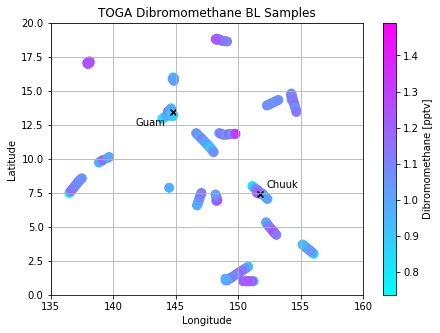

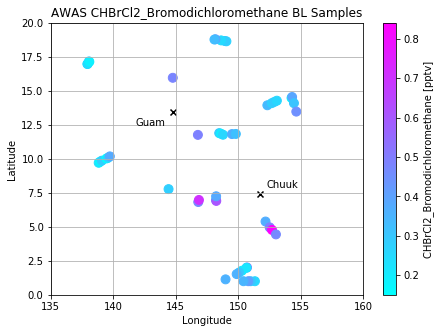

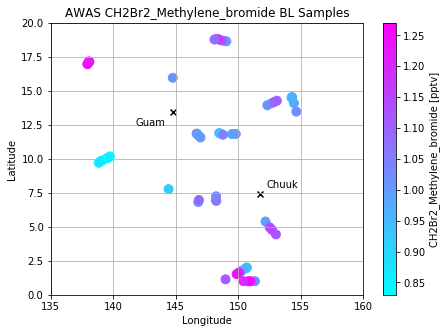

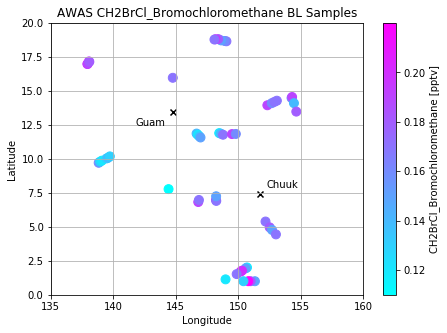

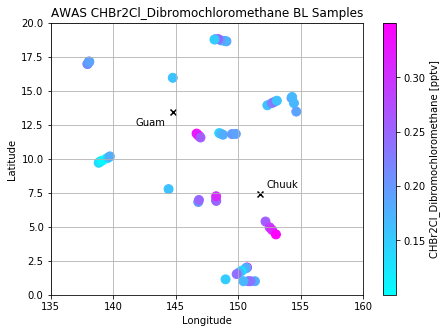

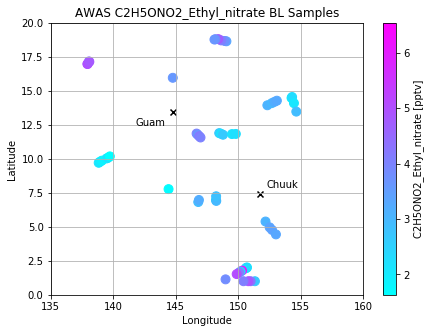

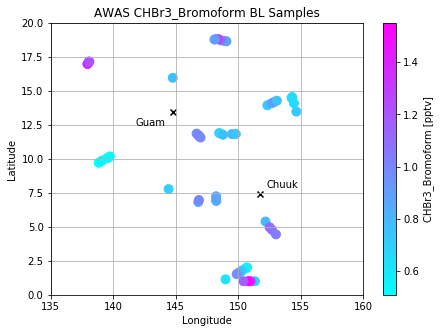

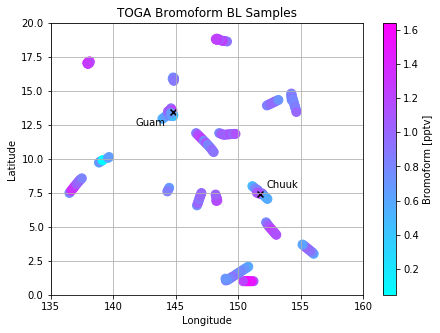

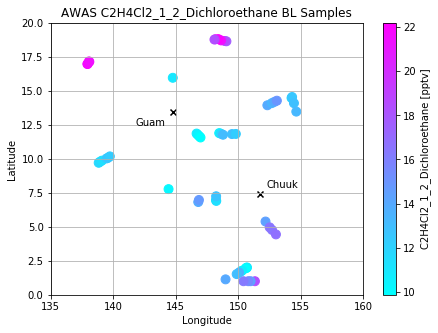

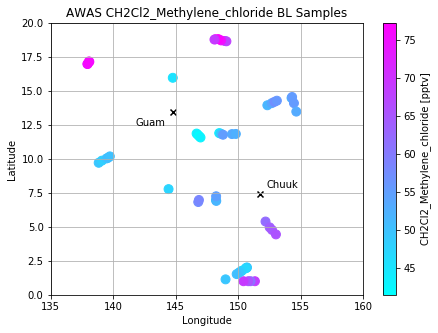

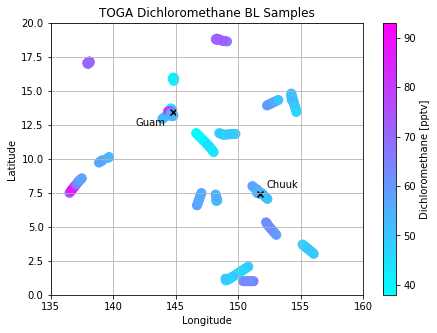

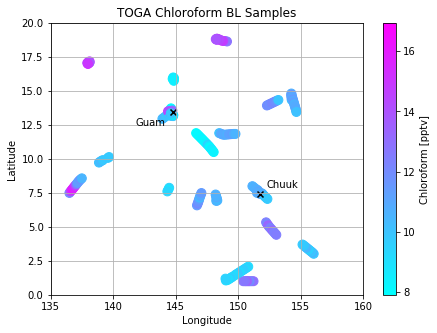

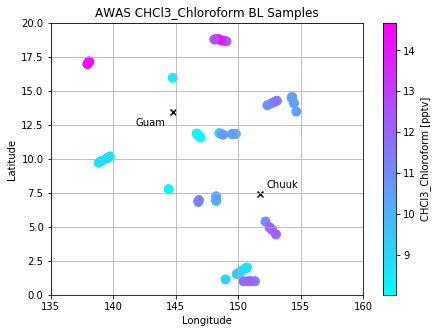

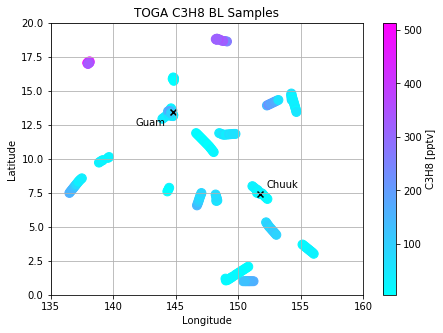

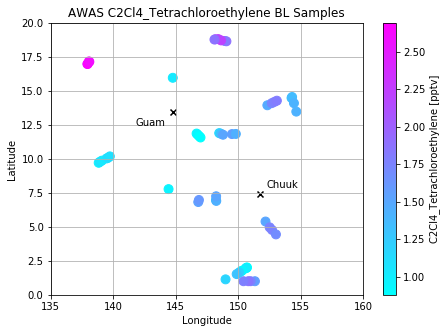

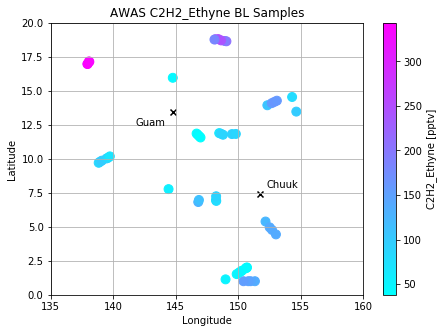

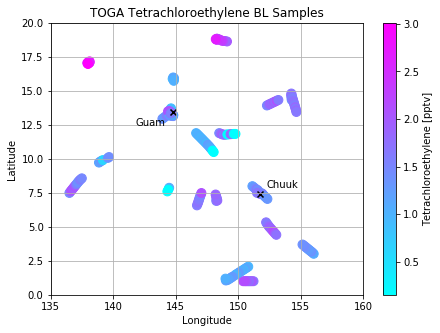

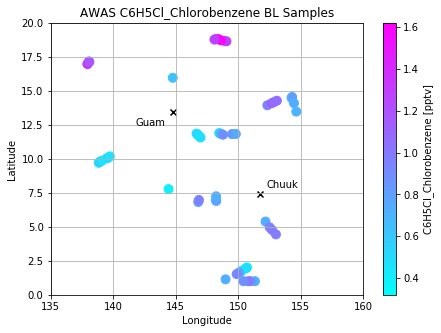

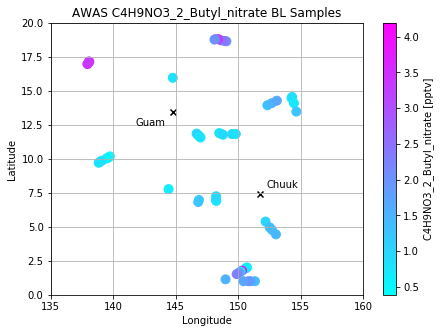

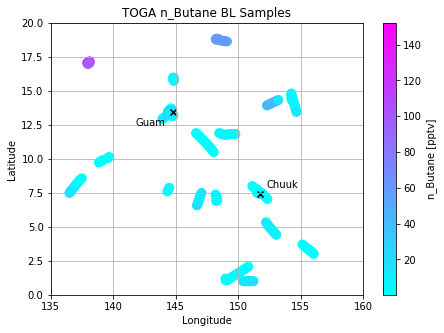

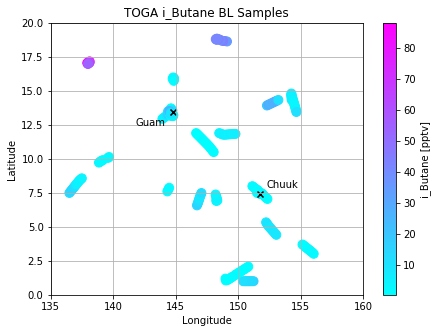

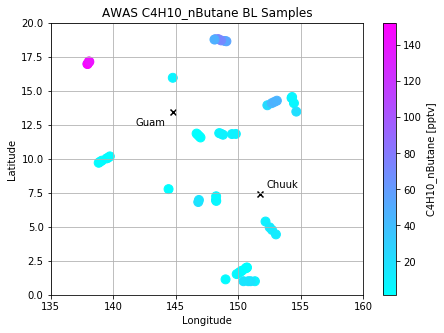

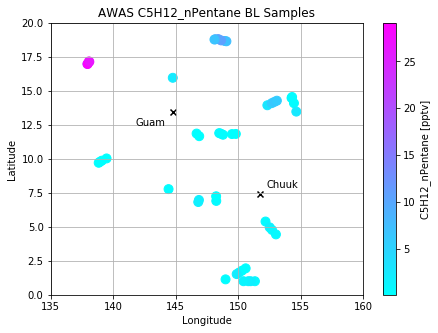

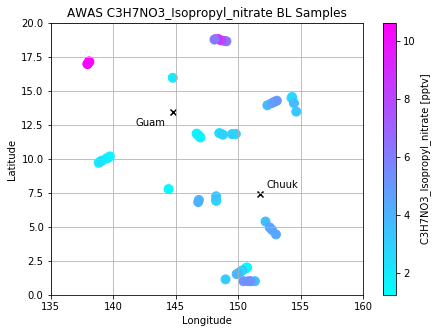

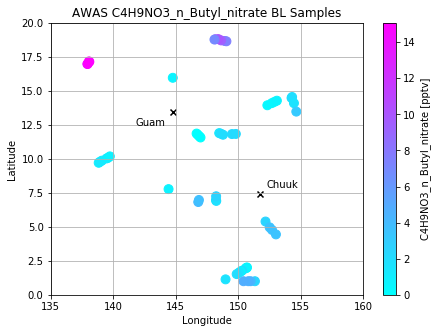

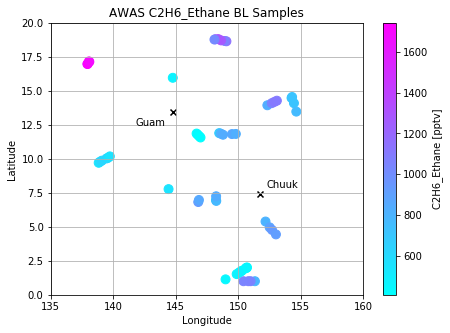

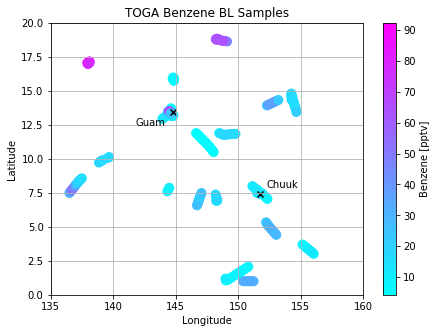

In [31]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, len(trc_gt)):
    trc_idx = i
    plot_blsamp(trc_idx)
    

In [32]:
trc_gt

,Tracer,Instrument,Count,Lifetime
0,Dibromomethane,TOGA,133,39.13
1,CHBrCl2_Bromodichloromethane,AWAS,63,27.46
2,CH2Br2_Methylene_bromide,AWAS,57,39.13
3,CH2BrCl_Bromochloromethane,AWAS,56,45.19
4,CHBr2Cl_Dibromochloromethane,AWAS,50,13.37
5,C2H5ONO2_Ethyl_nitrate,AWAS,44,12.35
6,CHBr3_Bromoform,AWAS,21,15.07
7,Bromoform,TOGA,18,15.07
8,C2H4Cl2_1_2_Dichloroethane,AWAS,16,19.
9,CH2Cl2_Methylene_chloride,AWAS,15,45.87


0.936 1.49


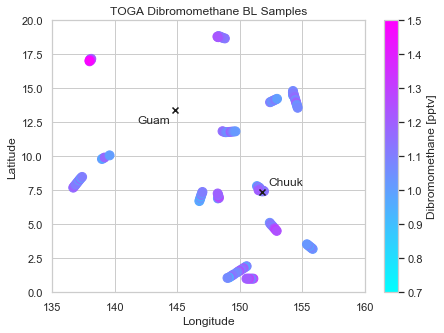

In [63]:
############################################################################################
############ plot bromoform, dibromomethane 

i = 0
#i = 6 
#i = 7

# ---------- choose tracer 
tt = trc_gt['Tracer'][i]
inst = trc_gt['Instrument'][i]
# dataframe for that tracer 
if inst == 'AWAS':
    trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
if inst == 'TOGA':
    trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
# get BL mean 
trcbl = trcdf[trcdf['GGALT'] < 500]

print(np.min(trcbl[tt]), np.max(trcbl[tt]))

############
# plot 
fig, ax = plt.subplots(figsize=(7, 5))
scb = plt.scatter(trcbl['GGLON'], trcbl['GGLAT'], c = trcbl[tt], s = 80,
                     cmap = 'cool', vmin = 0.7, vmax = 1.5)
cb = plt.colorbar(scb, ax = ax)
cb.set_label(tt + ' [pptv]')
ax.set_xlim([135, 160])
ax.set_ylim([0, 20])
ax.set_title(inst + ' ' + tt + ' BL Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(which = 'major')
# add guam 
plt.scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
plt.text(guam[0]-3, guam[1]-1, 'Guam')
ax.scatter(chuuk[0], chuuk[1], marker = 'x', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
plt.grid(which = 'major')

# save 
svname = str(trc_idx) + '_' + str(tt) + '_BL_samples_500m.pdf' 
fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/bl_samp/' + svname) 

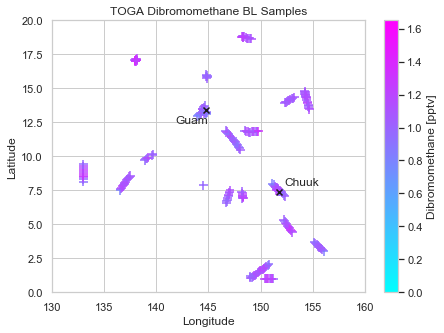

In [108]:
############################################################################################
############ plot bromoform, dibromomethane 

i = 0
#i = 6 
#i = 7

# ---------- choose tracer 
tt = trc_gt['Tracer'][i]
inst = trc_gt['Instrument'][i]
# dataframe for that tracer 
if inst == 'AWAS':
    trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
if inst == 'TOGA':
    trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
# get BL mean 
trcbl = trcdf[trcdf['GGALT'] < 2000]

############
# plot 
fig, ax = plt.subplots(figsize=(7, 5))
scb = plt.scatter(trcbl['GGLON'], trcbl['GGLAT'], c = trcbl[tt], 
                  s = 80, marker = '+',
                  cmap = 'cool', vmin = 0, vmax = 1.65)
cb = plt.colorbar(scb, ax = ax)
cb.set_label(tt + ' [pptv]')
ax.set_xlim([130, 160])
ax.set_ylim([0, 20])
ax.set_title(inst + ' ' + tt + ' BL Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add guam 
plt.scatter(guam[0], guam[1], marker = 'x', color = 'k', label = 'Chuuk')
plt.text(guam[0]-3, guam[1]-1, 'Guam')
ax.scatter(chuuk[0], chuuk[1], marker = 'x', color = 'k', label = 'Chuuk')
ax.text(chuuk[0]+0.5, chuuk[1]+0.5, 'Chuuk')
#plt.grid(which = 'major')

# save 
svname = str(trc_idx) + '_' + str(tt) + '_BL_samples_500m.pdf' 
fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/bl_samp/' + svname) 

In [93]:
####### define plotting function 
sns.set(style="whitegrid")

def make_bplot(mydata, myname):
    fig = plt.figure(figsize=(4, 5))
    mypal = "Set2"
    a = sns.boxplot(data = mydata, linewidth = 2, showmeans=True, palette=mypal, 
               meanprops={"marker":"x","markersize": "9", "markerfacecolor":"white", "markeredgecolor":"black"})
    a.set_title(myname + ' Distribution')
    a.set_ylabel('[pptv]')
    
    if (tt == 'Bromoform'):
        a.set_ylim([0, 1.7])
    elif (tt == 'CHBR3_Bromoform'):
        a.set_ylim([0, 1.7])
    else:
        a.set_ylim([0, 1.7])
    
    svname = 'BL_dist_'+str(myname) + '.pdf'
    fig.savefig('/Volumes/scdrive2/TTS_2020/examine_ratios/supp_figures/' + svname)  

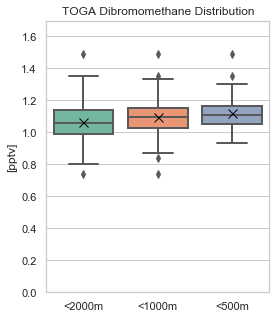

In [94]:
i = 0
#i = 6 
#i = 7

# ---------- choose tracer 
tt = trc_gt['Tracer'][i]
inst = trc_gt['Instrument'][i]

# dataframe for that tracer 
if inst == 'AWAS':
    trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
if inst == 'TOGA':
    trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]

# get BL 
bl2000 = trcdf[trcdf['GGALT'] < 2000]
bl1000 = trcdf[trcdf['GGALT'] < 1000]
bl500 = trcdf[trcdf['GGALT'] < 500]

#
df = pd.DataFrame()
df['<2000m'] = bl2000[tt]
df['<1000m'] = bl1000[tt]
df['<500m'] = bl500[tt]

# plot 
myname = inst + ' ' + tt
make_bplot(df, myname)


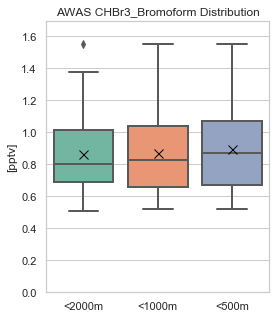

In [95]:
i = 6 
#i = 7

# ---------- choose tracer 
tt = trc_gt['Tracer'][i]
inst = trc_gt['Instrument'][i]

# dataframe for that tracer 
if inst == 'AWAS':
    trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
if inst == 'TOGA':
    trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]

# get BL 
bl2000 = trcdf[trcdf['GGALT'] < 2000]
bl1000 = trcdf[trcdf['GGALT'] < 1000]
bl500 = trcdf[trcdf['GGALT'] < 500]

#
df = pd.DataFrame()
df['<2000m'] = bl2000[tt]
df['<1000m'] = bl1000[tt]
df['<500m'] = bl500[tt]

# plot 
myname = inst + ' ' + tt
make_bplot(df, myname)

Bromoform


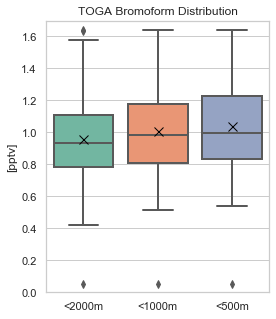

In [96]:
i = 7

# ---------- choose tracer 
tt = trc_gt['Tracer'][i]
print(tt)
inst = trc_gt['Instrument'][i]

# dataframe for that tracer 
if inst == 'AWAS':
    trcdf = awas_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]
if inst == 'TOGA':
    trcdf = toga_df[['Time_UTC', 'GGALT', 'GGLAT', 'GGLON', tt]]

# get BL 
bl2000 = trcdf[trcdf['GGALT'] < 2000]
bl1000 = trcdf[trcdf['GGALT'] < 1000]
bl500 = trcdf[trcdf['GGALT'] < 500]

#
df = pd.DataFrame()
df['<2000m'] = bl2000[tt]
df['<1000m'] = bl1000[tt]
df['<500m'] = bl500[tt]

# plot 
myname = inst + ' ' + tt
make_bplot(df, myname)